In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
a

array([[0.55234592, 0.34357528, 0.10407881],
       [0.28429538, 0.063008  , 0.65269662],
       [0.25646932, 0.42647814, 0.31705254],
       ...,
       [0.28887408, 0.28823508, 0.42289084],
       [0.13546389, 0.15697322, 0.70756289],
       [0.48316154, 0.25334075, 0.26349771]])

In [202]:
def generate_order(n=3, s=100, m=9000):
    if n == 0:
        return []
    uv = np.hstack([np.zeros([m, 1]),
                    np.sort(np.random.randint(low=0, high=s + 1, size=[m, n-1]), axis=1),
                    np.full([m, 1], s)])
    return np.diff(uv, axis=1).astype(int)

In [231]:
def generate_permute(n=3, s=100, limits=[[10, 40], [40, 50], [30, 35]], m=1000):
    if n == 0:
        return []
    min_array = []
    max_array = []
    for i, limit in zip(range(n), limits):
        min_array += [i] * limit[0]
        max_array += [i] * (limit[1] - limit[0])
    return np.vstack([np.unique(np.concatenate([np.array(min_array), np.random.permutation(max_array)])[:s], return_counts=True)[1] 
                      for _ in range(m)])

In [232]:
def plotter(a):
    fig = plt.figure(figsize=(10,10), dpi=100)
    ax = fig.add_subplot(projection='3d')

    # scatter the generated tripletes.
    surf = ax.scatter(*zip(*a), marker='o', color=a / 100)
    ax.view_init(elev=25., azim=75)
    
    ax.set_xlabel('$A_1$', fontsize='large', fontweight='bold')
    ax.set_ylabel('$A_2$', fontsize='large', fontweight='bold')
    ax.set_zlabel('$A_3$', fontsize='large', fontweight='bold')
    lim = (0, S); ax.set_xlim3d(*lim);ax.set_ylim3d(*lim);ax.set_zlim3d(*lim)
    plt.show()

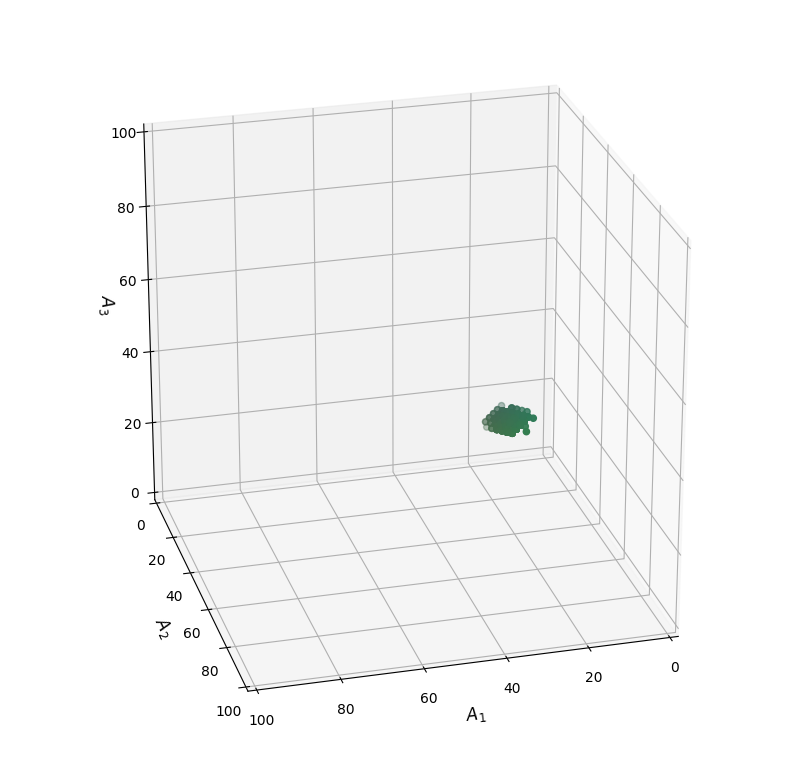

In [235]:
plotter(generate_permute())

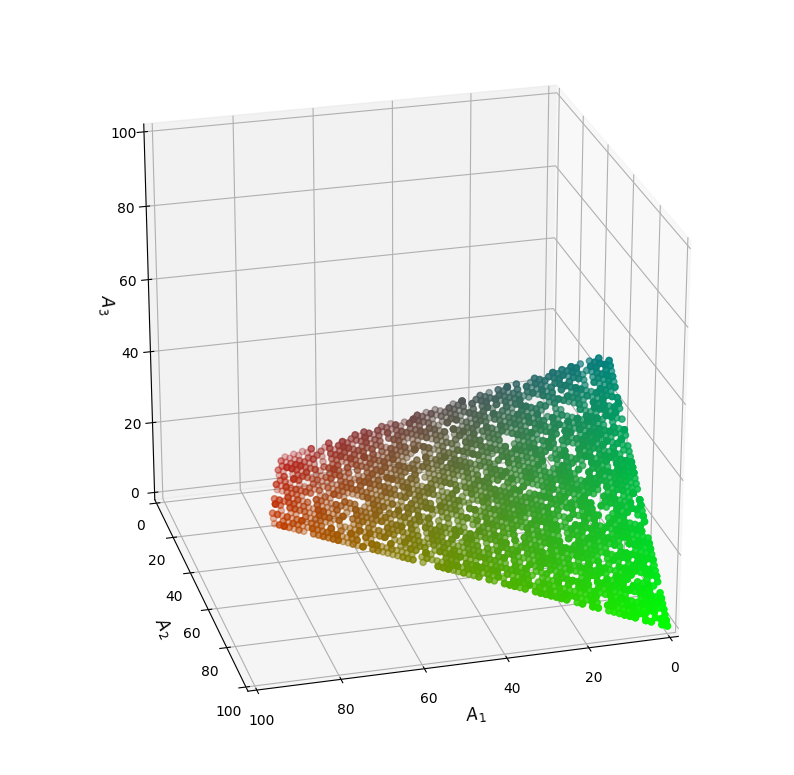

In [236]:
a = generate_order()
b = a[(a[:, 0] <= 3.5 * a[:, 1] + 2 * a[:, 2]) & (a[:, 1] >= (a[:, 2])),:]
plotter(b.astype(int))

In [122]:
import random
a = [1, 2, 3, 4]
b = [5, 6, 7, 8, 9]
l = [a, b]
c = [random.choice(l).pop(0) for i in range(len(a) + len(b)) if (a and b)] + a + b

In [123]:
c

[1, 2, 5, 6, 7, 8, 3, 4, 9]